# 🏅 Exploratory Data Analysis - Olympic Games Data

## Projekt_OS - Olympic Games Data Analysis

Detta notebook innehåller en grundlig utforskning av olympisk data från Kaggle-datasetet "120 years of Olympic history: athletes and results".

### Dataset Information
- **Källa**: [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- **Fil**: `athlete_events.csv`
- **Storlek**: ~200MB, 271,116 rader, 15 kolumner
- **Tidsperiod**: 1896-2016
- **Fokus**: Kanada (CAN)

### Innehåll
1. Data Loading och Översikt
2. Grundläggande Statistik
3. Visualiseringar
4. Kanada-specifik Analys

## 1. Imports och Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sätt stil för visualiseringar
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ladda data
data_path = os.path.join('..', 'data', 'athlete_events.csv')
df = pd.read_csv(data_path)
# Ensure figures directory exists to avoid FileNotFoundError when saving plots
figures_dir = os.path.join('..', 'figures')
os.makedirs(figures_dir, exist_ok=True)

print(f"Dataset shape: {df.shape}")
print(f"\nKolumner: {df.columns.tolist()}")
print(f"\nFörsta raderna:")
df.head()

## 2. Grundläggande Statistik

### 2.1 Dataset Översikt

In [ ]:
print("Dataset Översikt:\n")

print("Första 5 rader:")
print(df.head())

print("\nKolumner:")
print(df.columns.tolist())

print("\nInfo om data:")
print(df.info())

print("\nSaknade värden per kolumn:")
print(df.isna().sum())

### 2.2 Länder (NOC)

In [ ]:
unique_countries = df["NOC"].unique()
number_of_countries = len(unique_countries)

print("Antal länder medverkande:")
print(number_of_countries)

print("\nNamn på medverkande länder (NOC):")
print(np.sort(unique_countries))


### 2.3 Sporter


In [ ]:
unique_sports = df["Sport"].unique()
number_of_sports = len(unique_sports)

print("\nAntal sporter:")
print(number_of_sports)

print("\nNamn på medverkande sporter:")
print(np.sort(unique_sports))

### 2.4 Medaljtyper


In [ ]:
medal_types = df["Medal"].dropna().unique()

print("Medaljtyper:")
print(medal_types)

### 2.5 Åldersstatistik


In [ ]:
age_df = df["Age"].dropna()
age_stats = {"mean": age_df.mean(),
             "median": age_df.median(),
             "min": age_df.min(),
             "max": age_df.max(),
             "std": age_df.std()
            }
for key, value in age_stats.items():
    print(f"{key}: {value:.1f}")

## 3. Visualiseringar - Översikt

### 3.1 Könsfördelning


### 3.2 Top 10 Länder - Medaljer


### 3.3 Medaljer över tid


### 3.4 Åldersfördelning


## 4. Kanada-specifik Analys

### 4.1 Översikt - Kanadas Prestation

In [5]:
canada_df = df[df['NOC'] == 'CAN']

print(f"Deltagare från Kanada: {len(canada_df)}")
print(f"Antal unika deltagare från Kanada: {canada_df['ID'].nunique()}")

print(f"Kanada har tagit {canada_df["Medal"].notna().sum()} OS medaljer")
canada_medals = canada_df[canada_df['Medal'].notna()]['Medal'].value_counts().to_string()
print("Kanadas medaljfördelning")
print(canada_medals)


winter_medals = canada_df[(canada_df['Season'] == 'Winter') & (canada_df['Medal'].notna())].shape[0]
summer_medals = canada_df[(canada_df['Season'] == 'Summer') & (canada_df['Medal'].notna())].shape[0]
print(f"Kanada har tagit {winter_medals} vinter medaljer och {summer_medals} sommar medaljer")

Deltagare från Kanada: 9733
Antal unika deltagare från Kanada: 4811
Kanada har tagit 1352 OS medaljer
Kanadas medaljfördelning
Medal
Gold      463
Bronze    451
Silver    438
Kanada har tagit 611 vinter medaljer och 741 sommar medaljer


### 4.2 Kanadas Toppsporter

In [ ]:
canadas_top_sport = canada_df[canada_df['Medal'].notna()]['Sport'].value_counts().head(10)
plt.figure(figsize=(10,5))
canadas_top_sport.sort_values().plot(kind='barh')
plt.title("Kanadas top 10 sporter", fontsize = 15)
plt.xlabel("Antal Medaljer", fontsize = 13)
plt.ylabel("Sport", fontsize = 13)
plt.show


### 4.3 Kanadas Medaljer per OS

Text(0.5, 1.0, 'Kanadas medaljer genom åren')

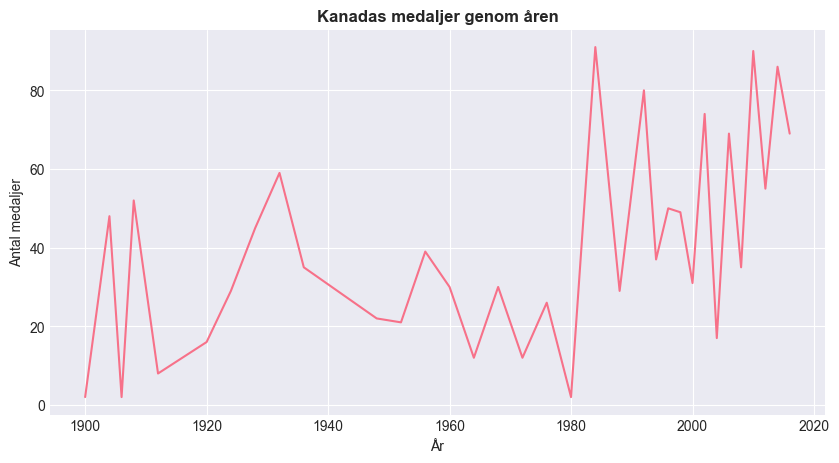

In [ ]:
canada_medals_per_os = canada_df[canada_df['Medal'].notna()].groupby('Year').size()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(canada_medals_per_os.index, canada_medals_per_os.values)
ax.set_xlabel("År")
ax.set_ylabel("Antal medaljer")
ax.set_title("Kanadas medaljer genom åren", fontweight = 'bold')

### 4.4 Kanadas Åldersfördelning

Text(0, 0.5, 'Antal personer')

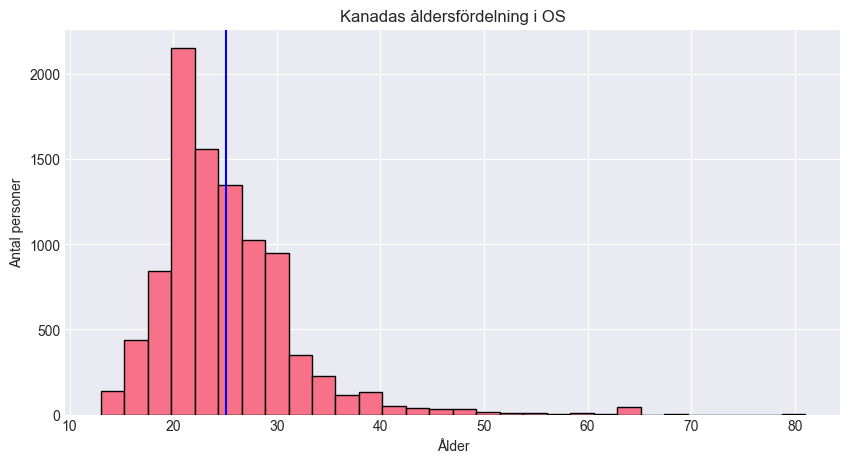

In [14]:
canada_age = canada_df['Age'].dropna()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(canada_age, bins=30, edgecolor='black')
ax.axvline(canada_age.mean(), color = 'blue')
ax.set_title("Kanadas åldersfördelning i OS")
ax.set_xlabel("Ålder")
ax.set_ylabel("Antal personer")

## 5. Sammanfattning

Detta notebook har genomfört en grundlig explorativ dataanalys av olympisk data med fokus på:

